### 노이즈 유형 (1) 문장부호
- Then, 과 Then을 다른 언어로 구분
- 따라서 분장부호화 단어를 분리할 수 있도록 공백을 부호의 양쪽에 추가한다.

In [1]:
def pad_punctuation(sentence, punc):
    for p in punc:
        sentence = sentence.replace(p, " " + p + " ")

    return sentence

sentence = "Hi, my name is john."

print(pad_punctuation(sentence, [".", "?", "!", ","]))

Hi ,  my name is john . 


### 노이즈 유형 (2) 대소문자
- 컴퓨터는 f와 F를 다르다고 구분. 
- 이를 방지하기 위해 모든 단어를 소문자로 바꿔준다.

In [3]:
sentence = "First, open the first chapter."

print(sentence.lower())

first, open the first chapter.


In [2]:
sentence = "First, open the first chapter."
print(sentence.upper(### 노이즈 유형 (2) 대소문자
- 컴퓨터는 f와 F를 다르다고 구분. 
- 이를 방지하기 위해 모든 단어를 소문자로 바꿔준다.))

FIRST, OPEN THE FIRST CHAPTER.


### 노이즈 유형 (3) 특수문자
- ten-year-old와 seven-year-old와 같은 나이 표현들을 각각의 단어 취급
- 이를 방지하기 위해 특수문자를 제거

In [4]:
import re

sentence = "He is a ten-year-old boy."
sentence = re.sub("([^a-zA-Z.,?!])", " ", sentence)

print(sentence)

He is a ten year old boy.


In [5]:
# From The Project Gutenberg
# (https://www.gutenberg.org/files/2397/2397-h/2397-h.htm)

corpus = \
"""
In the days that followed I learned to spell in this uncomprehending way a great many words, among them pin, hat, cup and a few verbs like sit, stand and walk. 
But my teacher had been with me several weeks before I understood that everything has a name.
One day, we walked down the path to the well-house, attracted by the fragrance of the honeysuckle with which it was covered. 
Some one was drawing water and my teacher placed my hand under the spout. 
As the cool stream gushed over one hand she spelled into the other the word water, first slowly, then rapidly. 
I stood still, my whole attention fixed upon the motions of her fingers. 
Suddenly I felt a misty consciousness as of something forgotten—a thrill of returning thought; and somehow the mystery of language was revealed to me. 
I knew then that "w-a-t-e-r" meant the wonderful cool something that was flowing over my hand. 
That living word awakened my soul, gave it light, hope, joy, set it free! 
There were barriers still, it is true, but barriers that could in time be swept away.
""" 

def cleaning_text(text, punc, regex):
    # 노이즈 유형 (1) 문장부호 공백추가
    for p in punc:
        text = text.replace(p, " " + p + " ")

    # 노이즈 유형 (2), (3) 소문자화 및 특수문자 제거
    text = re.sub(regex, " ", text).lower()

    return text

print(cleaning_text(corpus, [".", ",", "!", "?"], "([^a-zA-Z0-9.,?!\n])"))


in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it

## 토큰화
- **공백 기반 토큰화**는 문장을 공백으로 나누어 토큰화합니다. 
- 이 방법은 단어 단위로 토큰화를 수행하며, 간단하고 빠른 토큰화 방법입니다. 하지만, 단어 내의 구두점, 대소문자, 축약어 등을 처리하지 못하며, 영어에서는 약어나 이니셜 등이 문제가 됩니다.



- **형태소 기반 토큰화**는 단어의 의미를 고려하여 토큰화합니다. 
- 형태소란, 단어를 구성하는 가장 작은 의미 단위를 말합니다. 
- 따라서, 형태소 기반 토큰화는 단어 내의 구성 요소인 접두사, 접미사, 어근 등을 고려하여 토큰화합니다. 이 방법은 단어의 형태와 문법적인 정보를 보존할 수 있으며, 정보 검색이나 언어 학습에서 효과적입니다.


### 공백 기반 토큰화

In [7]:
corpus = \
"""
in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !  
there were barriers still ,  it is true ,  but barriers that could in time be swept away . 
"""

tokens = corpus.split()

print("문장이 포함하는 Tokens:", tokens)

문장이 포함하는 Tokens: ['in', 'the', 'days', 'that', 'followed', 'i', 'learned', 'to', 'spell', 'in', 'this', 'uncomprehending', 'way', 'a', 'great', 'many', 'words', ',', 'among', 'them', 'pin', ',', 'hat', ',', 'cup', 'and', 'a', 'few', 'verbs', 'like', 'sit', ',', 'stand', 'and', 'walk', '.', 'but', 'my', 'teacher', 'had', 'been', 'with', 'me', 'several', 'weeks', 'before', 'i', 'understood', 'that', 'everything', 'has', 'a', 'name', '.', 'one', 'day', ',', 'we', 'walked', 'down', 'the', 'path', 'to', 'the', 'well', 'house', ',', 'attracted', 'by', 'the', 'fragrance', 'of', 'the', 'honeysuckle', 'with', 'which', 'it', 'was', 'covered', '.', 'some', 'one', 'was', 'drawing', 'water', 'and', 'my', 'teacher', 'placed', 'my', 'hand', 'under', 'the', 'spout', '.', 'as', 'the', 'cool', 'stream', 'gushed', 'over', 'one', 'hand', 'she', 'spelled', 'into', 'the', 'other', 'the', 'word', 'water', ',', 'first', 'slowly', ',', 'then', 'rapidly', '.', 'i', 'stood', 'still', ',', 'my', 'whole', 'attenti

### 형태소 기반 토큰화

- [참고링크](https://wikidocs.net/21698)

In [6]:
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt

In [8]:
tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt()]

kor_text = '코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'

for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.pos(kor_text)))

[Hannanum] 
[('코로나바이러스', 'N'), ('는', 'J'), ('2019년', 'N'), ('12월', 'N'), ('중국', 'N'), ('우한', 'N'), ('에서', 'J'), ('처음', 'M'), ('발생', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('뒤', 'N'), ('전', 'N'), ('세계', 'N'), ('로', 'J'), ('확산', 'N'), ('되', 'X'), ('ㄴ', 'E'), (',', 'S'), ('새롭', 'P'), ('은', 'E'), ('유형', 'N'), ('의', 'J'), ('호흡기', 'N'), ('감염', 'N'), ('질환', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]
[Kkma] 
[('코로나', 'NNG'), ('바', 'NNG'), ('이러', 'MAG'), ('슬', 'VV'), ('는', 'ETD'), ('2019', 'NR'), ('년', 'NNM'), ('12', 'NR'), ('월', 'NNM'), ('중국', 'NNG'), ('우', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('에', 'VV'), ('서', 'ECD'), ('처음', 'NNG'), ('발생', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('뒤', 'NNG'), ('전', 'NNG'), ('세계', 'NNG'), ('로', 'JKM'), ('확산', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), (',', 'SP'), ('새', 'NNG'), ('롭', 'XSA'), ('ㄴ', 'ETD'), ('유형', 'NNG'), ('의', 'JKG'), ('호흡기', 'NNG'), ('감염', 'NNG'), ('질환', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
[Komoran] 
[('코로나바이러스', 'NNP'), ('는', 'JX'), ('2019', 'SN'

### Byte Pair Encoding(BPE)
- 가장 많이 등장하는 바이트 쌍을 새로운 단어로 치환하여 압축하는 작업을 반복하는 방식으로 동작
- 처음 등장하는 단어는 문자들의 조합으로 나타내서 OOV(Out-Of-Vocabulary) 문제를 해결할 수 있다.
[참고링크](https://arxiv.org/pdf/1508.07909.pdf)

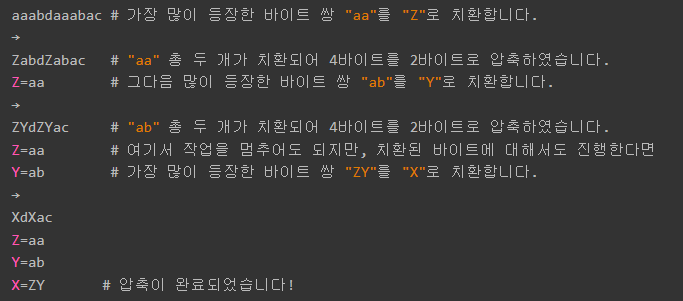

In [9]:
import re, collections

# 임의의 데이터에 포함된 단어들입니다.
# 우측의 정수는 임의의 데이터에 해당 단어가 포함된 빈도수입니다.
vocab = {
    'l o w '      : 5,
    'l o w e r '  : 2,
    'n e w e s t ': 6,
    'w i d e s t ': 3
}

num_merges = 5

def get_stats(vocab):
    """
    단어 사전을 불러와
    단어는 공백 단위로 쪼개어 문자 list를 만들고
    빈도수와 쌍을 이루게 합니다. (symbols)
    """
    pairs = collections.defaultdict(int)
    
    for word, freq in vocab.items():
        symbols = word.split()

        for i in range(len(symbols) - 1):             # 모든 symbols를 확인하여 
            pairs[symbols[i], symbols[i + 1]] += freq  # 문자 쌍의 빈도수를 저장합니다. 
        
    return pairs

def merge_vocab(pair, v_in):
    """
    문자 쌍(pair)과 단어 리스트(v_in)를 입력받아
    각각의 단어에서 등장하는 문자 쌍을 치환합니다.
    (하나의 글자처럼 취급)
    """
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
        
    return v_out, pair[0] + pair[1]

token_vocab = []

for i in range(num_merges):
    print(">> Step {0}".format(i + 1))
    
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)  # 가장 많은 빈도수를 가진 문자 쌍을 반환합니다.
    vocab, merge_tok = merge_vocab(best, vocab)
    print("다음 문자 쌍을 치환:", merge_tok)
    print("변환된 Vocab:\n", vocab, "\n")
    
    token_vocab.append(merge_tok)
    
print("Merged Vocab:", token_vocab)

>> Step 1
다음 문자 쌍을 치환: es
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w es t ': 6, 'w i d es t ': 3} 

>> Step 2
다음 문자 쌍을 치환: est
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 3
다음 문자 쌍을 치환: lo
변환된 Vocab:
 {'lo w ': 5, 'lo w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 4
다음 문자 쌍을 치환: low
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 5
다음 문자 쌍을 치환: ne
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'ne w est ': 6, 'w i d est ': 3} 

Merged Vocab: ['es', 'est', 'lo', 'low', 'ne']


- Embedding 레이어는 단어의 개수 x Embedding 차원 수의 Weight를 생성하기 때문에 단어의 개수가 줄어드는 것은 곧 메모리의 절약으로 이어진다.

- 하지만 만약 수많은 데이터를 사용해 만든 BPE 사전으로 모델을 학습시키고 문장을 생성하게 했다고 하자. 
- 그게 [i, am, a, b, o, y, a, n, d, you, are, a, gir, l]이라면, 어떤 기준으로 이들을 결합해서 문장을 복원하기 어렵게 된다.

### Wordpiece Model (WPM)
- 아래 두 단계를 거쳐 진행합니다.
    1.  공백 복원을 위해 단어의 시작 부분에 언더바 _ 를 추가합니다.
    2. 빈도수 기반이 아닌 가능도(Likelihood)를 증가시키는 방향으로 문자 쌍을 합칩니다. (더 '그럴듯한' 토큰을 만들어냅니다.)


- [_i, _am, _a, _b, o, y, _a, n, d, _you, _are, _a, _gir, l]로 토큰화를 한다고 가정하면,
- 문장을 복원하는 과정이 **1) 모든 토큰을 합친 후, 2) 언더바 _를 공백으로 치환**하는 것으로 간단하게 끝나게 된다.

[참고링크](https://github.com/google/sentencepiece)


### soynpl

- 한국어 자연어 처리를 위한 라이브러리
- 토크나이저 외에도 단어 추출, 품사 판별, 전처리 기능 제공
- '학습데이터를 이용하지 않으면서 데이터에 존재하는 단어를 찾거나 문장을 단어열로 분해, 혹은 품사 판별을 할 수 있는 비지도학습 접근법을 지향'
- 통계적인 기법을 활용해서 비지도학습을 가능하게 한다 - 통계 기반 Torkenizer

[참고링크](https://github.com/lovit/soynlp)

## 토큰에 의미 부여하기

### word2vec
- CBOW와 Skip-Gram의 두가지 방법이 존재함

#### 1) CBOW (Continuous Bag Of Word)

- 주변 단어를 보고 중심 단어를 예측 (예측해야되는 단어가 중심단어, 예측에 필요한 입력이 주변단어)
- 중심 단어를 예측하기 위해 좌/우 각각 n개의 단어를 확인 (Window)
- Window를 옆으로 이동하면서 중심단어를 계속 예측 (Window Sliding)
- 은닉층이 하나이고 활성화 함수가 없음 (Hidden Layer -> Projection Layer)
- 은닉층이 하나이기에 Shallow Neural Network라고 불린다.
<div>
    <img src="attachment:image.png" style="display: block; margin: 0 auto;">
    <img src="attachment:image-2.png" style="display: block; margin: 0 auto;">
</div>


#### 2) Skip-Gram

- 중심단어를 보고 주변 값을 예측
- CBOW와 달리 평균을 계산하는 과정이 없다.
- CBOW에 비해서 성능이 좋음

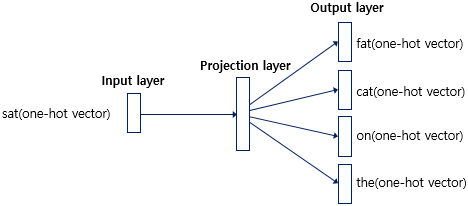

[참고링크](https://wikidocs.net/22660)


<p style="color: red;"> 하지만 위의 모든 WordEmbedding 알고리즘은 동음이의어를 처리할 수 없다.</p>

- 맛있는 사과가 놓여있다.
- 나는 그에게 사과했다.

위 글에서 두 사과의 의미를 동일한 벡터로 치부하고 표현하는 문제가 있다. 이를 해결한 것이 아래의 ELMo 알고리즘이다.

### ELMo - the 1st Contextualized Word Embedding

- 앞서 언급된 문제를 해결하기 위해선 그 단어가 사용된 주변 단어의 맥락을 넘어서 사용된 시퀀스 전체의 맥락이 함께 고려되는 Word Embedding이 필요하다. - **Contextualized Word Embedding**

- 양방향 LSTM을 사용한다.
- 순방향 LSTM은 언어 모델링 과제에서 LSTM을 사용하는 것과 동일한 방식으로 학습된다.
- 역방향 LSTM은 주어진 문장의 끝에서 n개의 단어를 역순으로 보고 n-1 번째 단어를 맞추는 방법으로 진행된다.
- 이 과정에서 두 LSTM은 서로 hidden state를 공유하지 않고 로그 우도를 동시에 최대화하는 방식으로 학습한다. (**Maximally Likelyhood**)

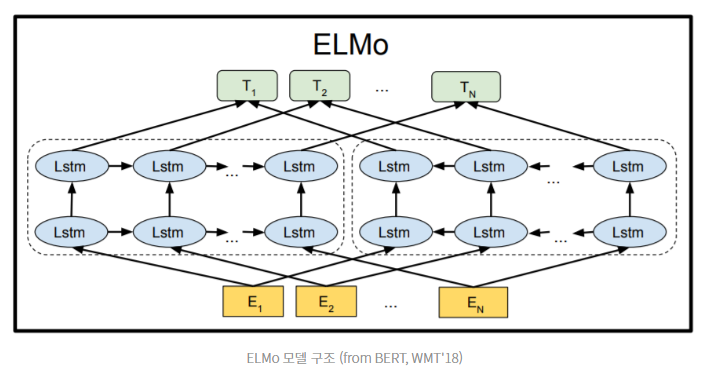

- 기존 어휘 임베딩(입력 토큰의 word vector, 노란색), 순방향 LSTM의 hidden state vector(좌측 파란색), 역방향 LSTM의 hidden state vector(우측 파란색)를 concatenate한 벡터가 ELMo의 Contextual Word Embedding이 됩니다.